In [1]:
import random
import time
import os
import glob 
import networkx as nx
import numpy as np
from copy import deepcopy
from tabulate import tabulate
from matplotlib import pyplot as plt

RESULTS_PATH = "resultsGA"

if not os.path.exists(RESULTS_PATH):
    os.makedirs(RESULTS_PATH)

# Omogućava prikaz grafikona unutar Notebook-a
%matplotlib inline

In [2]:
# def maxNumOfColours(graph):
#     maxDegree = 0
#     for i in graph:
#         degree = len(list(graph.neighbors(i)))
#         if degree > maxDegree:
#             maxDegree = degree
#     return maxDegree

# def readGraph(filePath):
#     graph = nx.Graph()
#     with open(filePath) as f:
#         lines = f.readlines()

#         #.txt fajl, da ne pukne osiguravamo se zbog pocetka sa p
#         pLine = [l for l in lines if l.startswith('p')]
#         if pLine:
#             numNodes = int(pLine[0].split()[2])
#         else:
#             numNodes = int(lines[0].split()[2])
        

#         #numNodes = int(lines[0].split()[2])
#         # Normalizacija grana: sorted osigurava da je (1,2) isto što i (2,1)
#         rawEdges = [tuple(map(int, line.split()[1:])) for line in lines[1:] if line.startswith('e')]
#         edges = [tuple(sorted(edge)) for edge in rawEdges]
#         graph.add_nodes_from(range(1, numNodes + 1))
#         graph.add_edges_from(edges)
#     return graph

# def getFitness(chromosome, edges, maxNode):
#     conflicts = 0
#     nodeMap = {i: [] for i in range(1, maxNode + 1)}
#     for i, color in enumerate(chromosome):
#         u, v = edges[i]
#         nodeMap[u].append(color)
#         nodeMap[v].append(color)
#     for node in nodeMap:
#         colors = nodeMap[node]
#         if len(colors) > 1:
#             conflicts += (len(colors) - len(set(colors)))
#     return conflicts

def maxNumOfColours(graph):
    maxDegree = 0
    for i in graph:
        degree = len(list(graph.neighbors(i)))
        if degree > maxDegree:
            maxDegree = degree
    return maxDegree

# def maxNumOfColours(graph):
#     return max(dict(graph.degree()).values()) if graph.number_of_nodes() > 0 else 0
# def readGraph(filePath):
#     graph = nx.Graph()
#     with open(filePath, 'r') as f:
#         lines = f.readlines()
    
#     edges = []
#     numNodes = 0
    
#     for line in lines:
#         line = line.strip()
#         if not line:
#             continue   
#         parts = line.split()
#         if 'edge' in parts:
#             try:
#                 numNodes = int(parts[2])
#             except (IndexError, ValueError):
#                 pass
#             continue
        
#         if (parts[0] == 'p' or parts[0] == 'e') and len(parts) >= 3:
#             try:
#                 u, v = int(parts[1]), int(parts[2])
#                 edges.append((u, v))
#             except ValueError:
#                 continue
#         elif len(parts) == 2:
#             try:
#                 u, v = int(parts[0]), int(parts[1])
#                 edges.append((u, v))
#             except ValueError:
#                 continue

#     if edges:
#         graph.add_edges_from(edges)
#         if numNodes == 0:
#             numNodes = max(max(u, v) for u, v in edges)
#         graph.add_nodes_from(range(1, numNodes + 1))
#     return graph

def readGraph(filePath):
    graph = nx.Graph()
    edges = []
    
    with open(filePath, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if not parts: continue
            
            # Preskoči meta-podatke (p edge 11 55)
            if parts[0] in ['p', 'c', 'edge']:
                continue
            
            # Čitaj ivice
            try:
                if len(parts) >= 2:
                    # Uzimamo prva dva broja u redu, šta god da su
                    u, v = int(parts[-2]), int(parts[-1])
                    edges.append((u, v))
            except ValueError:
                continue

    # Ključni momenat: NetworkX automatski kreira čvorove na osnovu ivica
    graph.add_edges_from(edges)
    
    # Ispisujemo tačan broj učitanih ivica radi tvoje provere
    # Ako ovde ne piše 55 za K11, fajl ti ne valja!
    return graph
# def readGraph(filePath):
#     graph = nx.Graph()
#     with open(filePath, 'r') as f:
#         for line in f:
#             line = line.strip()
#             if not line or line.startswith('c'):
#                 continue
#             parts = line.split()
#             if parts[0] == 'e':
#                 u, v = int(parts[1]), int(parts[2])
#                 graph.add_edge(u, v)
#     return graph


# def getFitness(chromosome, edges, maxNode):
#     conflicts = 0
#     nodeMap = {i: [] for i in range(1, maxNode + 1)}
#     for i, color in enumerate(chromosome):
#         u, v = edges[i]
#         nodeMap[u].append(color)
#         nodeMap[v].append(color)
#     for node in nodeMap:
#         colors = nodeMap[node]
#         if len(colors) > 1:
#             conflicts += (len(colors) - len(set(colors)))
#     return conflicts



# def getFitness(chromosome, edges, maxNode):
#     if len(chromosome) != len(edges):
#         print(f"ALARM: Hromozom ima {len(chromosome)} gena, a graf ima {len(edges)} ivica!")
#     # ... ostatak koda ...
#     conflicts = 0
#     nodeMap = {} # Prazan rečnik
#     # 1. Mapiramo koje boje ulaze u koji čvor
#     #nodeMap = {i: [] for i in range(1, maxNode + 1)}
#     for i, color in enumerate(chromosome):
#         u, v = edges[i]
#         # Ako čvor ne postoji u mapi, napravi ga
#         if u not in nodeMap: nodeMap[u] = []
#         if v not in nodeMap: nodeMap[v] = []
#         nodeMap[u].append(color)
#         nodeMap[v].append(color)
    
#     # 2. Računamo konflikte preciznije
#     for node in nodeMap:
#         color_counts = {}
#         for c in nodeMap[node]:
#             color_counts[c] = color_counts.get(c, 0) + 1
        
#         for c in color_counts:
#             k = color_counts[c]
#             if k > 1:
#                 # Svaki par ivica iste boje u istom čvoru je konflikt
#                 conflicts += (k * (k - 1)) // 2 
                
#     return conflicts
# def getFitness(chromosome, edges, maxNode):
#     conflicts = 0
#     # Provera dužine - AKO OVO ISPIŠE, ZNAŠ GDE JE KVAR
#     if len(chromosome) != len(edges):
#         print(f"GRESKA: Hromozom ima {len(chromosome)}, a graf {len(edges)} ivica!")
#         return 999999 

#     # Proveravamo svaku ivicu sa svakom drugom
#     for i in range(len(edges)):
#         for j in range(i + 1, len(edges)):
#             # Ako dve ivice dele čvor (u, v) i (x, y)
#             u, v = edges[i]
#             x, y = edges[j]
            
#             if u == x or u == y or v == x or v == y:
#                 # Ako dele čvor, a imaju ISTU BOJU -> KONFLIKT!
#                 if chromosome[i] == chromosome[j]:
#                     conflicts += 1
#     return conflicts

def getFitness(chromosome, edges, maxNode):
    # Ako dužine nisu iste, nešto ozbiljno ne valja sa učitavanjem
    if len(chromosome) != len(edges):
        return 999999

    conflicts = 0
    # nodeMap: čvor -> lista boja ivica koje su povezane s njim
    nodeMap = {}

    for i in range(len(edges)):
        u, v = edges[i]
        color = chromosome[i]
        
        # Registruj boju za oba čvora ivice
        for node in [u, v]:
            if node not in nodeMap:
                nodeMap[node] = []
            nodeMap[node].append(color)

    # Sada brojimo konflikte
    for node, colors in nodeMap.items():
        # Brojimo koliko se koja boja puta pojavljuje u ovom čvoru
        from collections import Counter
        counts = Counter(colors)
        
        for color, count in counts.items():
            if count > 1:
                # Ako se ista boja javi 'count' puta, to je:
                # npr. 2 ivice = 1 konflikt, 3 ivice = 3 konflikta, 4 ivice = 6...
                conflicts += (count * (count - 1)) // 2
                
    return conflicts

In [3]:
# def selectionTournament(population, fitnesses, k=3):
#     participants = random.sample(list(zip(population, fitnesses)), k)
#     return min(participants, key=lambda x: x[1])[0]

# def selectionRoulette(population, fitnesses):
#     # Što manji fitnes, to veća šansa (proporcionalno 1/f)
#     invertedFitness = [1.0 / (f + 1e-6) for f in fitnesses]
#     total = sum(invertedFitness)
#     pick = random.uniform(0, total)
#     current = 0
#     for i, f in enumerate(invertedFitness):
#         current += f
#         if current > pick:
#             return population[i]
#     return population[0]

# def selectionRank(population, fitnesses):
#     popSize = len(population)
#     sortedIndices = np.argsort(fitnesses)[::-1] 
#     ranks = np.empty(popSize)
#     for rank, idx in enumerate(range(popSize)):
#         ranks[sortedIndices[idx]] = rank + 1
#     totalRank = sum(ranks)
#     pick = random.uniform(0, totalRank)
#     current = 0
#     for i in range(popSize):
#         current += ranks[i]
#         if current > pick: return population[i]
#     return population[0]
def selectionTournament(population, fitnesses, k=3):
    participants = random.sample(list(zip(population, fitnesses)), k)
    return min(participants, key=lambda x: x[1])[0]

def selectionRoulette(population, fitnesses):
    # Što manji fitnes, to veća šansa (proporcionalno 1/f)
    invertedFitness = [1.0 / (f + 1e-6) for f in fitnesses]
    total = sum(invertedFitness)
    pick = random.uniform(0, total)
    current = 0
    for i, f in enumerate(invertedFitness):
        current += f
        if current > pick:
            return population[i]
    return population[0]

def selectionRank(population, fitnesses):
    popSize = len(population)
    sortedIndices = np.argsort(fitnesses)
    ranks = np.empty(popSize)
    for rank, idx in enumerate(range(popSize)):
        ranks[sortedIndices[idx]] = popSize - rank
    totalRank = sum(ranks)
    pick = random.uniform(0, totalRank)
    current = 0
    for i in range(popSize):
        current += ranks[i]
        if current > pick: return population[i]
    return population[0]
# def selectionTournament(population, fitnesses, k=3):
#     participants = random.sample(list(zip(population, fitnesses)), k)
#     return deepcopy(min(participants, key=lambda x: x[1])[0])


# def selectionRoulette(population, fitnesses):
#     inverted = [1 / (f + 1e-6) for f in fitnesses]
#     total = sum(inverted)
#     pick = random.uniform(0, total)
#     cur = 0
#     for sol, w in zip(population, inverted):
#         cur += w
#         if cur >= pick:
#             return deepcopy(sol)
#     return deepcopy(population[-1])


# def selectionRank(population, fitnesses):
#     ranked = sorted(zip(population, fitnesses), key=lambda x: x[1])
#     return deepcopy(ranked[0][0])


In [4]:
# def crossoverUniform(p1, p2):
#     return [p1[i] if random.random() < 0.5 else p2[i] for i in range(len(p1))]

# def crossoverSinglePoint(p1, p2):
#     point = random.randint(1, len(p1) - 1)
#     return p1[:point] + p2[point:]

# def crossoverTwoPoint(p1, p2):
#     size = len(p1)
#     if size < 3: return crossoverSinglePoint(p1, p2)
#     pt1 = random.randint(1, size - 2)
#     pt2 = random.randint(pt1 + 1, size - 1)
#     return p1[:pt1] + p2[pt1:pt2] + p1[pt2:]
def crossoverUniform(p1, p2):
    return [p1[i] if random.random() < 0.5 else p2[i] for i in range(len(p1))]

def crossoverSinglePoint(p1, p2):
    point = random.randint(1, len(p1) - 1)
    return p1[:point] + p2[point:]

def crossoverTwoPoint(p1, p2):
    size = len(p1)
    if size < 3: return crossoverSinglePoint(p1, p2)
    pt1 = random.randint(1, size - 2)
    pt2 = random.randint(pt1 + 1, size - 1)
    return p1[:pt1] + p2[pt1:pt2] + p1[pt2:]
# def crossoverUniform(p1, p2):
#     return [p1[i] if random.random() < 0.5 else p2[i] for i in range(len(p1))]


# def crossoverSinglePoint(p1, p2):
#     pt = random.randint(1, len(p1) - 1)
#     return p1[:pt] + p2[pt:]


# def crossoverTwoPoint(p1, p2):
#     if len(p1) < 3:
#         return crossoverSinglePoint(p1, p2)
#     a = random.randint(1, len(p1) - 2)
#     b = random.randint(a + 1, len(p1) - 1)
#     return p1[:a] + p2[a:b] + p1[b:]


In [5]:
# def mutationSmart(chromosome, edges, maxNode, delta):
#     idx = random.randrange(len(chromosome))
#     u, v = edges[idx]
#     forbidden = set()
#     for i, (n1, n2) in enumerate(edges):
#         if i != idx and (n1 in (u, v) or n2 in (u, v)):
#             forbidden.add(chromosome[i])
#     available = list(set(range(1, delta + 2)) - forbidden)
#     if available:
#         chromosome[idx] = random.choice(available)
#     else:
#         chromosome[idx] = random.randint(1, delta + 1)
#     return chromosome

# def mutationRandom(chromosome, edges, maxNode, delta):
#     idx = random.randrange(len(chromosome))
#     chromosome[idx] = random.randint(1, delta + 1)
#     return chromosome

# def mutationSwap(chromosome, edges, maxNode, delta):
#     idx1, idx2 = random.sample(range(len(chromosome)), 2)
#     chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
#     return chromosome
def mutationSmart(chromosome, edges, maxNode, numColors):
    idx = random.randrange(len(chromosome))
    u, v = edges[idx]
    forbidden = set()
    
    # Prolazimo kroz sve ivice da nađemo susedne (optimizaćemo ovo kasnije)
    for i, (n1, n2) in enumerate(edges):
        if i != idx and (n1 in (u, v) or n2 in (u, v)):
            forbidden.add(chromosome[i])
            
    # Koristimo isključivo DOZVOLJENI opseg boja (numColors)
    available = list(set(range(1, numColors + 1)) - forbidden)
    
    if available:
        chromosome[idx] = random.choice(available)
    else:
        # Ako nema slobodne boje u dozvoljenom opsegu, 
        # uzmi bilo koju iz DOZVOLJENOG opsega, ne dodaj nove!
        chromosome[idx] = random.randint(1, numColors) 
    return chromosome


def mutationRandom(chromosome, edges, maxNode,numColors):
    idx = random.randrange(len(chromosome))
    chromosome[idx] = random.randint(1, numColors)
    return chromosome

#def mutationSwap(chromosome, edges, maxNode, delta):
#    idx1, idx2 = random.sample(range(len(chromosome)), 2)
#    chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
#    return chromosome
#KAO NIJE KORISNO ZA MINIMUM EDGE COLORING


def mutationConflict(chromosome, edges, maxNode, numColors):
    # 1. Mapiramo koji čvor ima koje boje na svojim ivicama
    # Ovo nam pomaže da brzo vidimo gde su duplikati boja
    node_colors = {i: [] for i in range(1, maxNode + 1)}
    for i, (u, v) in enumerate(edges):
        node_colors[u].append(chromosome[i])
        node_colors[v].append(chromosome[i])
        
    # 2. Pronalazimo indekse svih ivica koje učestvuju u konfliktu
    conflicted_indices = []
    for i, (u, v) in enumerate(edges):
        # Ako se trenutna boja ivice pojavljuje više od jednom kod čvora u ili v
        if node_colors[u].count(chromosome[i]) > 1 or node_colors[v].count(chromosome[i]) > 1:
            conflicted_indices.append(i)
            
    # 3. Akcija:
    if not conflicted_indices:
        # Ako nema konflikata (čestitamo!), uradi malu nasumičnu promenu
        idx = random.randrange(len(chromosome))
        chromosome[idx] = random.randint(1, numColors)
    else:
        # Izaberi jednu od ivica koje STVARNO prave problem i promeni joj boju
        idx = random.choice(conflicted_indices)
        chromosome[idx] = random.randint(1, numColors)
    
    return chromosome



In [6]:
# # def runGaModular(graph, maxIters, popSize, selFunc, crossFunc, mutFunc):
# #     edges = list(graph.edges())
# #     if not edges: return [], 0, []
# #     maxNode, delta, numEdges = max(graph.nodes()), maxNumOfColours(graph), len(edges)
# #     population = [[random.randint(1, delta + 1) for _ in range(numEdges)] for _ in range(popSize)]
    
# #     history = [] # Za grafikon konvergencije
    
# #     for gen in range(maxIters):
# #         fitnesses = [getFitness(c, edges, maxNode) for c in population]
# #         bestFit = min(fitnesses)
# #         history.append(bestFit)
        
# #         if bestFit == 0:
# #             history.extend([0] * (maxIters - len(history)))
# #             break
            
# #         popWithFit = sorted(zip(population, fitnesses), key=lambda x: x[1])
# #         newPop = [popWithFit[0][0], popWithFit[1][0]] # Elitizam
        
# #         while len(newPop) < popSize:
# #             p1, p2 = selFunc(population, fitnesses), selFunc(population, fitnesses)
# #             child = crossFunc(p1, p2)
# #             if random.random() < 0.3:
# #                 child = mutFunc(child, edges, maxNode, delta)
# #             newPop.append(child)
# #         population = newPop
        
# #     finalFits = [getFitness(c, edges, maxNode) for c in population]
# #     bestIdx = np.argmin(finalFits)
# #     return population[bestIdx], finalFits[bestIdx], history
# def runGaModular(graph, maxIters, popSize, selFunc, crossFunc, mutFunc, numColours):
#     edges = list(graph.edges())
#     if not edges: return [], 0, []
#     maxNode, numEdges = max(graph.nodes()), len(edges)
#     population = [[random.randint(1, numColours) for _ in range(numEdges)] for _ in range(popSize)]
#     history = []
#     for gen in range(maxIters):
#         fitnesses = [getFitness(c, edges, maxNode) for c in population]
#         bestFit = min(fitnesses)
#         history.append(bestFit)
#         if bestFit == 0:
#             history.extend([0] * (maxIters - len(history)))
#             break
#         popWithFit = sorted(zip(population, fitnesses), key=lambda x: x[1])
#         newPop = [popWithFit[0][0], popWithFit[1][0]]
#         while len(newPop) < popSize:
#             p1, p2 = selFunc(population, fitnesses), selFunc(population, fitnesses)
#             child = crossFunc(p1, p2)
#             if random.random() < 0.3:
#                 child = mutFunc(child, edges, maxNode, numColours)
#             newPop.append(child)
#         population = newPop
#     finalFits = [getFitness(c, edges, maxNode) for c in population]
#     bestIdx = np.argmin(finalFits)
#     return population[bestIdx], finalFits[bestIdx], history
def runGaModular(graph, maxIters, popSize, selFunc, crossFunc, mutFunc, numColours):
    edges = list(graph.edges())
    if not edges: return [], 0, []
    
    # maxNode nam treba za mutationConflict da zna veličinu rečnika čvorova
    maxNode = max(graph.nodes())
    numEdges = len(edges)
    
    # Inicijalizacija: Sada strogo poštujemo numColours
    population = [[random.randint(1, numColours) for _ in range(numEdges)] for _ in range(popSize)]
    
    history = []
    
    for gen in range(maxIters):
        fitnesses = [getFitness(c, edges, maxNode) for c in population]
        bestFit = min(fitnesses)
        history.append(bestFit)
        
        if bestFit == 0:
            # Popunjavamo istoriju do kraja radi grafikona
            history.extend([0] * (maxIters - len(history)))
            break
            
        # Elitizam: Sortiramo i uzimamo 2 najbolja
        popWithFit = sorted(zip(population, fitnesses), key=lambda x: x[1])
        newPop = [popWithFit[0][0], popWithFit[1][0]]
        
        while len(newPop) < popSize:
            # 1. Poboljšanje: Izbegavamo da p1 i p2 budu ista jedinka (ako je moguće)
            p1_idx = population.index(selFunc(population, fitnesses))
            p2_idx = population.index(selFunc(population, fitnesses))
            
            # Ako je populacija raznolika, probaj da nađeš različite roditelje
            attempts = 0
            while p1_idx == p2_idx and attempts < 5:
                p2_idx = population.index(selFunc(population, fitnesses))
                attempts += 1
            
            p1, p2 = population[p1_idx], population[p2_idx]
            
            # 2. Ukrštanje
            child = crossFunc(p1, p2)
            
            # 3. Mutacija (povećana šansa jer koristimo pametne mutacije)
            # Za Edge Coloring, 0.3 - 0.4 je odličan ratio
            if random.random() < 0.35:
                # mutationConflict i mutationSmart sada dobijaju sve što im treba
                child = mutFunc(child, edges, maxNode, numColours)
                
            newPop.append(child)
            
        population = newPop
        
    # Finalna provera najboljeg
    finalFits = [getFitness(c, edges, maxNode) for c in population]
    bestIdx = np.argmin(finalFits)
    
    return population[bestIdx], finalFits[bestIdx], history

In [7]:
# def processAndVisualize(filePath):
#     graph = readGraph(filePath)
#     fileName = os.path.basename(filePath)
#     delta = maxNumOfColours(graph)
    
#     selections = [selectionTournament, selectionRoulette, selectionRank]
#     crossovers = [crossoverSinglePoint, crossoverUniform, crossoverTwoPoint]
#     mutations = [mutationRandom, mutationSmart, mutationSwap]
    
#     allResults = []

#     print(f"\n>>> ANALYZING GRAPH: {fileName}")
#     for sel in selections:
#         for cross in crossovers:
#             for mut in mutations:
#                 sName = sel.__name__.replace('selection', '')
#                 cName = cross.__name__.replace('crossover', '')
#                 mName = mut.__name__.replace('mutation', '')
                
#                 t0 = time.perf_counter()
#                 sol, fit, hist = runGaModular(graph, 250, 40, sel, cross, mut)
#                 dt = time.perf_counter() - t0
                
#                 allResults.append({
#                     'selection': sName,
#                     'crossover': cName,
#                     'mutation': mName,
#                     'fit': fit,
#                     'time': dt,
#                     'hist': hist,
#                     'sol': sol
#                 })

#     allResults.sort(key=lambda x: (x['fit'], x['time']))
    
#     # odvojene kolone
#     fullTableData = []
    # for i, r in enumerate(allResults):
    #     fullTableData.append([
    #         i, 
    #         r['selection'], 
    #         r['crossover'], 
    #         r['mutation'], 
    #         r['fit'], 
    #         delta + 1, 
    #         f"{r['time']:.6f}"
    #     ])

    # headers = ["", "selection", "crossover", "mutation", "num of conf", "colours", "time"]

    # # 1. konzola: top 3
    # print(f"Top 3 Combinations for {fileName}:")
    # print(tabulate(fullTableData[:3], headers=headers, tablefmt="fancy_grid"))

    # # 2. fajl: svih 27
    # txtPath = os.path.join(RESULTS_PATH, fileName) 
    # with open(txtPath, 'w', encoding='utf-8') as f:
    #     f.write(f"Graph can be coloured with {delta} or {delta+1} colours. Class 1 or class 2 respectively.\n")
    #     f.write(tabulate(fullTableData, headers=headers, tablefmt="fancy_grid"))
    #     if allResults[0]['fit'] == 0:
    #         f.write(f"\nGraph is class 1, meaning chromatic index is equal to the graph's degree.")
    #     else:
    #         f.write(f"\nNo conflict-free colouring is found, therefore graph is classified as class 2.")

    # # 3. VIZUELIZACIJA
    # plt.figure(figsize=(16, 7))
    
    # # podplot 1: Obojeni graf
    # plt.subplot(1, 2, 1)
    # pos = nx.spring_layout(graph, seed=42)
    # nx.draw(graph, pos, edge_color=allResults[0]['sol'], width=2, with_labels=True, 
    #         node_color='lightblue', edge_cmap=plt.cm.rainbow)
    # plt.title(f"Winner (Rank 0):\n{allResults[0]['selection']} + {allResults[0]['crossover']} + {allResults[0]['mutation']}")

    # # podplot 2: Konvergencija
    # plt.subplot(1, 2, 2)
    # for i in range(min(3, len(allResults))):
    #     res = allResults[i]
    #     # ISPIS SVA TRI OPERATORA U LEGENDI:
    #     label_name = f"Rank {i}: {res['selection']} + {res['crossover']} + {res['mutation']}"
    #     plt.plot(res['hist'], label=label_name, linewidth=2.5)
    
    # # osa
    # plt.xlabel("Generations (Algorithm Progress)", fontsize=11)
    # plt.ylabel("Number of Conflicts (Fitness)", fontsize=11)
    # plt.title(f"Convergence Race: Top 3 Algorithms for {fileName}", fontsize=13)
    
    # # namestanje legende
    # plt.legend(loc='upper right', fontsize='small')
    # plt.grid(True, linestyle=':', alpha=0.8)
    
    # plt.tight_layout()
    # plt.show()

    # plt.close('all')#dodato naknadno

    # print(f"Full table (27 combinations) saved to: {txtPath}")
    
# def processAndVisualize(filePath):
#     graph = readGraph(filePath)
#     fileName = os.path.basename(filePath)
#     delta = maxNumOfColours(graph)
#     if graph.number_of_edges() == 0: return

    
#     f_lower = fileName.lower()
#     type_info = "Unknown Graph Type"
#     theory_note = ""
#     is_bipartite = nx.is_bipartite(graph)
#     if "completegraph" in f_lower or "k_" in f_lower:
#         try:
#             n = int(''.join(filter(str.isdigit, fileName)))
#             type_info = f"Complete Graph K({n})"
#             if n % 2 == 0: theory_note = f"Class 1 (Expected χ' = Δ = {n-1})"
#             else: theory_note = f"Class 2 (Expected χ' = Δ + 1 = {n})"
#         except: type_info = "Complete Graph"
#     elif "bipartite" in f_lower or is_bipartite:
#         type_info = "Bipartite Graph"
#         theory_note = f"Always Class 1 (Expected χ' = Δ = {delta})"
#     elif "petersen" in f_lower or "snark" in f_lower or "flower" in f_lower:
#         type_info = "SNARK / Petersen Graph"
#         theory_note = f"Class 2 (Expected χ' = Δ + 1 = {delta+1})"
#     elif "regular" in f_lower:
#         type_info = f"Random Regular Graph (d={delta})"
#         theory_note = "Most are Class 1"
#     elif "graph" in f_lower:
#         type_info = "Random G(n,p) Graph"
#         theory_note = "Vizing's Theorem: Class 1 or 2"

#     print(f"\n>>> ANALYZING: {fileName}")
#     print(f"[TYPE]: {type_info}")
#     if theory_note: print(f"[THEORY]: {theory_note}")

#     selections = [selectionTournament, selectionRoulette, selectionRank]
#     crossovers = [crossoverSinglePoint, crossoverUniform, crossoverTwoPoint]
#     mutations = [mutationRandom, mutationSmart, mutationSwap]

    
#     def run_tests(num_cols):
#         res_list = []
#         for sel in selections:
#             for cross in crossovers:
#                 for mut in mutations:
#                     sName = sel.__name__.replace('selection', '')
#                     cName = cross.__name__.replace('crossover', '')
#                     mName = mut.__name__.replace('mutation', '')
#                     t0 = time.perf_counter()
#                     sol, fit, hist = runGaModular(graph, 500, 100, sel, cross, mut, num_cols)
#                     dt = time.perf_counter() - t0
#                     res_list.append({'selection': sName, 'crossover': cName, 'mutation': mName,
#                                      'fit': fit, 'time': dt, 'hist': hist, 'sol': sol, 'cols': num_cols})
#         return res_list

#     # Prvi krug
#     allResults = run_tests(delta)
#     allResults.sort(key=lambda x: (x['fit'], x['time']))
    
#     found_zero = allResults[0]['fit'] == 0
#     secondAttemptResults = []

#     if not found_zero:
#         print(f"!!! Nema nule sa {delta} boja. Pokrećem Delta + 1 = {delta+1}...")
#         secondAttemptResults = run_tests(delta + 1)
#         secondAttemptResults.sort(key=lambda x: (x['fit'], x['time']))

    
#     def prepare_table(results):
#         data = []
#         for i, r in enumerate(results):
#             data.append([i, r['selection'], r['crossover'], r['mutation'], r['fit'], r['cols'], f"{r['time']:.6f}"])
#         return data

#     headers = ["Rank", "selection", "crossover", "mutation", "num of conf", "colours", "time"]
    
#     # Konzola: Top 3
#     print(f"Top 3 Combinations for {fileName}:")
#     print(tabulate(prepare_table(allResults if found_zero else secondAttemptResults)[:3], headers=headers, tablefmt="fancy_grid"))

#     # Fajl: format sa dopisivanjem rezultata
#     txtPath = os.path.join(RESULTS_PATH, fileName) 
#     with open(txtPath, 'w', encoding='utf-8') as f:
#         f.write(f"Graph: {fileName} | Type: {type_info}\nTheory: {theory_note}\nMax Degree (Delta): {delta}\n\n")
#         f.write("--- RESULTS FOR DELTA ---\n")
#         f.write(tabulate(prepare_table(allResults), headers=headers, tablefmt="fancy_grid"))
#         if secondAttemptResults:
#             f.write("\n\n--- RESULTS FOR DELTA + 1 ---\n")
#             f.write(tabulate(prepare_table(secondAttemptResults), headers=headers, tablefmt="fancy_grid"))
        
#         if found_zero: f.write(f"\n\nRESULT: Class 1 found (Index = {delta})")
#         elif secondAttemptResults and secondAttemptResults[0]['fit'] == 0: f.write(f"\n\nRESULT: Class 2 found (Index = {delta+1})")
#         else: f.write(f"\n\nRESULT: GA failed to find 0 conflicts.")

    
#     best = allResults[0] if found_zero or not secondAttemptResults else secondAttemptResults[0]
#     plt.figure(figsize=(16, 7))
#     plt.subplot(1, 2, 1)
#     pos = nx.spring_layout(graph, seed=42)
#     nx.draw(graph, pos, edge_color=best['sol'], width=2.5, with_labels=True, node_color='lightblue', edge_cmap=plt.cm.rainbow)
#     plt.title(f"Winner (Rank 0):\n{best['selection']} + {best['crossover']} + {best['mutation']}")

#     plt.subplot(1, 2, 2)
#     plot_data = allResults[:3] if found_zero else secondAttemptResults[:3]
#     for i, res in enumerate(plot_data):
#         label_name = f"Rank {i}: {res['selection']} + {res['crossover']} + {res['mutation']}"
#         plt.plot(res['hist'], label=label_name, linewidth=2.5)
    
#     plt.xlabel("Generations (Algorithm Progress)", fontsize=11)
#     plt.ylabel("Number of Conflicts (Fitness)", fontsize=11)
#     plt.title(f"Convergence Race: Top 3 Algorithms for {fileName}", fontsize=13)
#     plt.legend(loc='upper right', fontsize='small')
#     plt.grid(True, linestyle=':', alpha=0.8)
#     plt.tight_layout()
#     plt.show()
#     plt.close('all')
#     print(f"Full table saved to: {txtPath}")
def processAndVisualize(filePath):
    graph = readGraph(filePath)

    # >>> OVDE DODAJ OVE LINIJE <<<
    print(f"\n" + "="*40)
    print(f"DEBUG ZA FAJL: {os.path.basename(filePath)}")
    print(f"Stvarni broj čvorova: {graph.number_of_nodes()}")
    print(f"Stvarni broj ivica: {graph.number_of_edges()}")
    # >>> KRAJ DODATKA <<<

    fileName = os.path.basename(filePath)
    delta = maxNumOfColours(graph)

    # Dodaj i ovo da proverimo šta je funkcija izračunala za Deltu
    print(f"Izračunata Delta: {delta}")
    print("="*40 + "\n")

    if graph.number_of_edges() == 0: return

    
    f_lower = fileName.lower()
    type_info = "Unknown Graph Type"
    theory_note = ""
    is_bipartite = nx.is_bipartite(graph)
    if "completegraph" in f_lower or "k_" in f_lower:
        try:
            n = int(''.join(filter(str.isdigit, fileName)))
            type_info = f"Complete Graph K({n})"
            if n % 2 == 0: theory_note = f"Class 1 (Expected χ' = Δ = {n-1})"
            else: theory_note = f"Class 2 (Expected χ' = Δ + 1 = {n})"
        except: type_info = "Complete Graph"
    elif "bipartite" in f_lower or is_bipartite:
        type_info = "Bipartite Graph"
        theory_note = f"Always Class 1 (Expected χ' = Δ = {delta})"
    elif "petersen" in f_lower or "snark" in f_lower or "flower" in f_lower:
        type_info = "SNARK / Petersen Graph"
        theory_note = f"Class 2 (Expected χ' = Δ + 1 = {delta+1})"
    elif "regular" in f_lower:
        type_info = f"Random Regular Graph (d={delta})"
        theory_note = "Most are Class 1"
    elif "graph" in f_lower:
        type_info = "Random G(n,p) Graph"
        theory_note = "Vizing's Theorem: Class 1 or 2"

    print(f"\n>>> ANALYZING: {fileName}")
    print(f"[TYPE]: {type_info}")
    if theory_note: print(f"[THEORY]: {theory_note}")

    selections = [selectionTournament, selectionRoulette, selectionRank]
    crossovers = [crossoverSinglePoint, crossoverUniform, crossoverTwoPoint]
    mutations = [mutationRandom, mutationSmart, mutationConflict]

    
    def run_tests(num_cols):
        res_list = []
        for sel in selections:
            for cross in crossovers:
                for mut in mutations:
                    sName = sel.__name__.replace('selection', '')
                    cName = cross.__name__.replace('crossover', '')
                    mName = mut.__name__.replace('mutation', '')
                    t0 = time.perf_counter()
                    sol, fit, hist = runGaModular(graph, 500, 100, sel, cross, mut, num_cols)
                    dt = time.perf_counter() - t0
                    res_list.append({'selection': sName, 'crossover': cName, 'mutation': mName,
                                     'fit': fit, 'time': dt, 'hist': hist, 'sol': sol, 'cols': num_cols})
        return res_list

    # Prvi krug
    allResults = run_tests(delta)
    allResults.sort(key=lambda x: (x['fit'], x['time']))
    
    found_zero = allResults[0]['fit'] == 0
    secondAttemptResults = []

    if not found_zero:
        print(f"!!! Nema nule sa {delta} boja. Pokrećem Delta + 1 = {delta+1}...")
        secondAttemptResults = run_tests(delta + 1)
        secondAttemptResults.sort(key=lambda x: (x['fit'], x['time']))

    
    def prepare_table(results):
        data = []
        for i, r in enumerate(results):
            data.append([i, r['selection'], r['crossover'], r['mutation'], r['fit'], r['cols'], f"{r['time']:.6f}"])
        return data

    headers = ["Rank", "selection", "crossover", "mutation", "num of conf", "colours", "time"]
    
    # Konzola: Top 3
    print(f"Top 3 Combinations for {fileName}:")
    print(tabulate(prepare_table(allResults if found_zero else secondAttemptResults)[:3], headers=headers, tablefmt="fancy_grid"))

    # Fajl: format sa dopisivanjem rezultata
    txtPath = os.path.join(RESULTS_PATH, fileName) 
    with open(txtPath, 'w', encoding='utf-8') as f:
        f.write(f"Graph: {fileName} | Type: {type_info}\nTheory: {theory_note}\nMax Degree (Delta): {delta}\n\n")
        f.write("--- RESULTS FOR DELTA ---\n")
        f.write(tabulate(prepare_table(allResults), headers=headers, tablefmt="fancy_grid"))
        if secondAttemptResults:
            f.write("\n\n--- RESULTS FOR DELTA + 1 ---\n")
            f.write(tabulate(prepare_table(secondAttemptResults), headers=headers, tablefmt="fancy_grid"))
        
        if found_zero: f.write(f"\n\nRESULT: Class 1 found (Index = {delta})")
        elif secondAttemptResults and secondAttemptResults[0]['fit'] == 0: f.write(f"\n\nRESULT: Class 2 found (Index = {delta+1})")
        else: f.write(f"\n\nRESULT: GA failed to find 0 conflicts.")

    
    best = allResults[0] if found_zero or not secondAttemptResults else secondAttemptResults[0]
    plt.figure(figsize=(16, 7))
    plt.subplot(1, 2, 1)
    pos = nx.spring_layout(graph, seed=42)
    #nx.draw(graph, pos, edge_color=best['sol'], width=2.5, with_labels=True, node_color='lightblue', edge_cmap=plt.cm.rainbow)
    edges_list = list(graph.edges())
    nx.draw(graph, pos, 
        edgelist=edges_list,        # Eksplicitno kažemo koje ivice crtamo
        edge_color=best['sol'],     # Boje iz pobedničkog hromozoma
        width=3.0,                  # Malo deblje ivice da se bolje vidi boja
        with_labels=True, 
        node_color='lightblue', 
        node_size=500,
        edge_cmap=plt.cm.rainbow)   # Mapira brojeve 1, 2, 3... u dugu
        #edge_vmin=1,                # Najmanja moguća boja
        #edge_vmax=num_cols)         # Najveća moguća boja (numColours)
    plt.title(f"Winner (Rank 0):\n{best['selection']} + {best['crossover']} + {best['mutation']}")

    plt.subplot(1, 2, 2)
    plot_data = allResults[:3] if found_zero else secondAttemptResults[:3]
    for i, res in enumerate(plot_data):
        label_name = f"Rank {i}: {res['selection']} + {res['crossover']} + {res['mutation']}"
        plt.plot(res['hist'], label=label_name, linewidth=2.5)
    
    plt.xlabel("Generations (Algorithm Progress)", fontsize=11)
    plt.ylabel("Number of Conflicts (Fitness)", fontsize=11)
    plt.title(f"Convergence Race: Top 3 Algorithms for {fileName}", fontsize=13)
    plt.legend(loc='upper right', fontsize='small')
    plt.grid(True, linestyle=':', alpha=0.8)
    plt.tight_layout()
    plt.show()
    plt.close('all')
    print(f"Full table saved to: {txtPath}")


########################################
# ENTERING FOLDER: smallTests
########################################

DEBUG ZA FAJL: graph11.txt
Stvarni broj čvorova: 11
Stvarni broj ivica: 10
Izračunata Delta: 3


>>> ANALYZING: graph11.txt
[TYPE]: Bipartite Graph
[THEORY]: Always Class 1 (Expected χ' = Δ = 3)
Top 3 Combinations for graph11.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤══════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │     time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪══════════╡
│      0 │ Rank        │ SinglePoint │ Smart      │             0 │         3 │ 0.005563 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      1 │ Rank        │ SinglePoint │ Random     │             0 │         3 │ 0.005565 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      2 │ Roulett

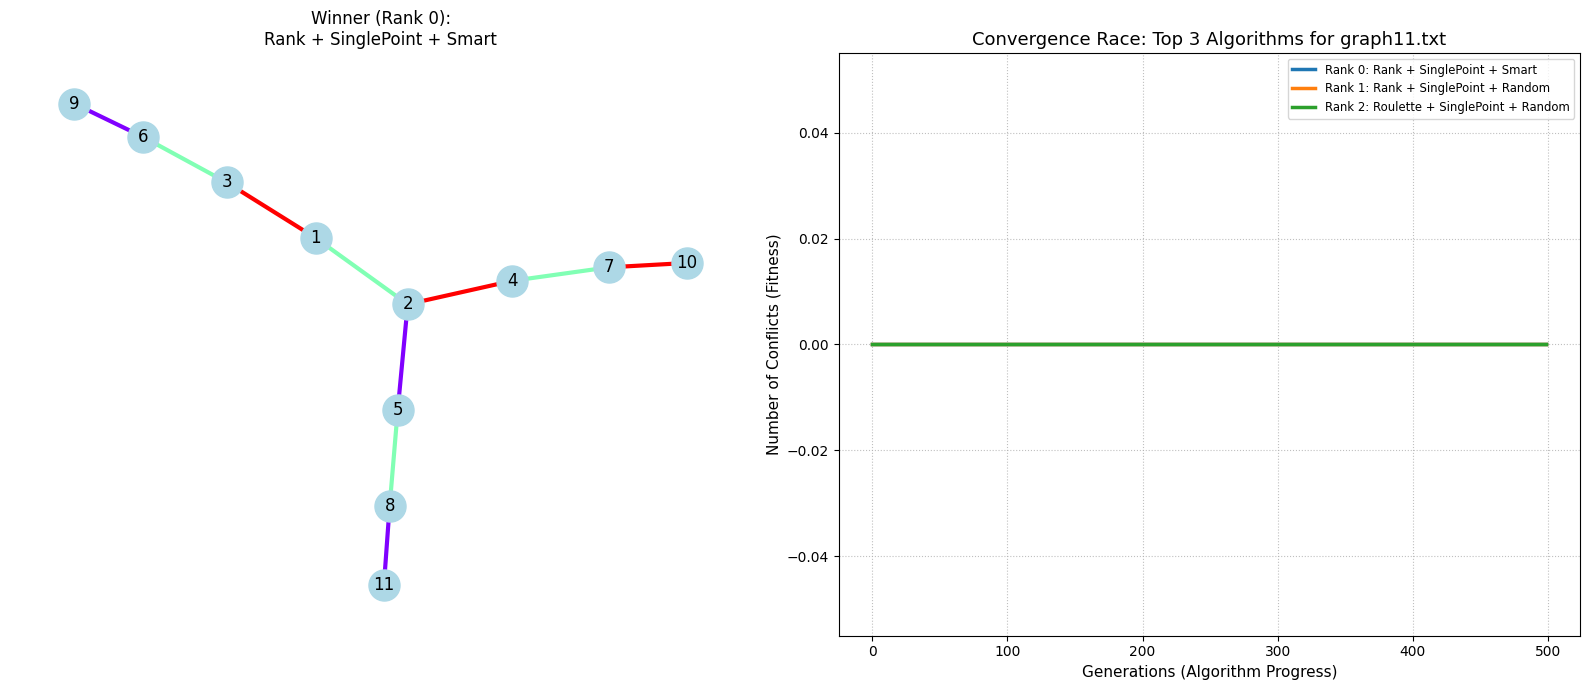

Full table saved to: resultsGA/graph11.txt

DEBUG ZA FAJL: graph13.txt
Stvarni broj čvorova: 13
Stvarni broj ivica: 35
Izračunata Delta: 9


>>> ANALYZING: graph13.txt
[TYPE]: Random G(n,p) Graph
[THEORY]: Vizing's Theorem: Class 1 or 2
Top 3 Combinations for graph13.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤══════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │     time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪══════════╡
│      0 │ Tournament  │ TwoPoint    │ Smart      │             0 │         9 │ 0.120454 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      1 │ Tournament  │ Uniform     │ Smart      │             0 │         9 │ 0.129304 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      2 │ Tournament  │ SinglePoint │ Smart      │             0 │         9 │ 0.133112 │

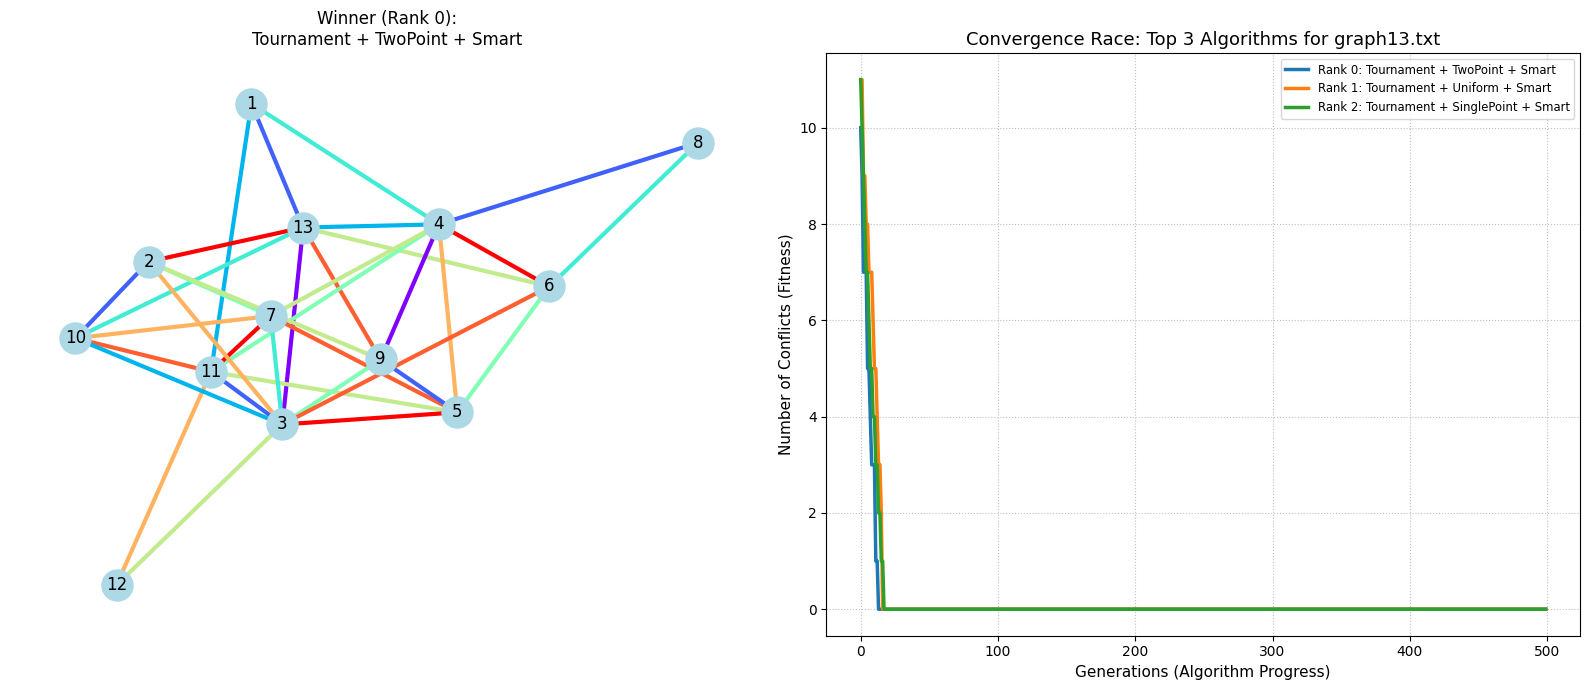

Full table saved to: resultsGA/graph13.txt

DEBUG ZA FAJL: graph15.txt
Stvarni broj čvorova: 15
Stvarni broj ivica: 30
Izračunata Delta: 6


>>> ANALYZING: graph15.txt
[TYPE]: Random G(n,p) Graph
[THEORY]: Vizing's Theorem: Class 1 or 2
Top 3 Combinations for graph15.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤══════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │     time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪══════════╡
│      0 │ Tournament  │ SinglePoint │ Smart      │             0 │         6 │ 0.104668 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      1 │ Tournament  │ TwoPoint    │ Conflict   │             0 │         6 │ 0.112115 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      2 │ Tournament  │ SinglePoint │ Conflict   │             0 │         6 │ 0.11752  │

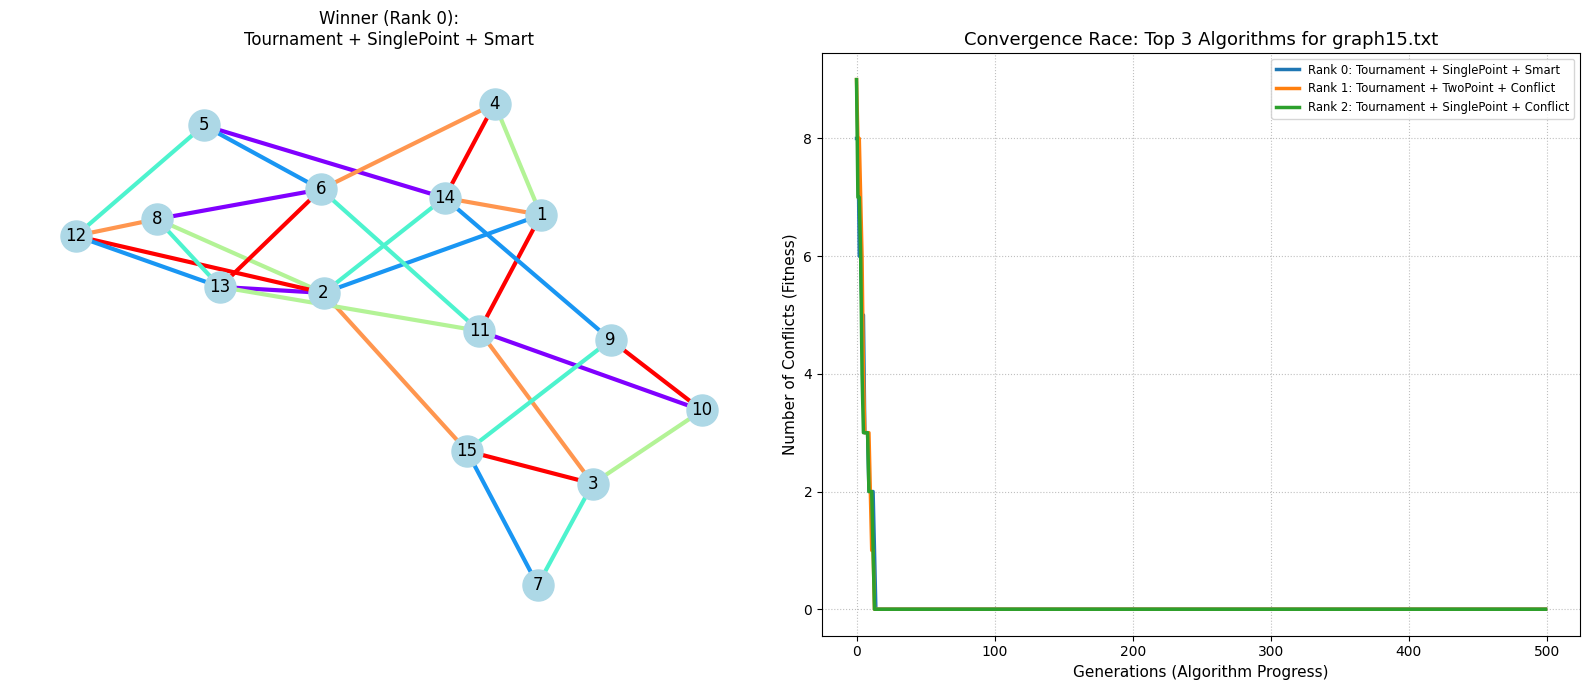

Full table saved to: resultsGA/graph15.txt

DEBUG ZA FAJL: graph5.txt
Stvarni broj čvorova: 5
Stvarni broj ivica: 5
Izračunata Delta: 3


>>> ANALYZING: graph5.txt
[TYPE]: Random G(n,p) Graph
[THEORY]: Vizing's Theorem: Class 1 or 2
Top 3 Combinations for graph5.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤══════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │     time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪══════════╡
│      0 │ Roulette    │ SinglePoint │ Conflict   │             0 │         3 │ 0.002406 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      1 │ Rank        │ TwoPoint    │ Conflict   │             0 │         3 │ 0.002567 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      2 │ Rank        │ TwoPoint    │ Smart      │             0 │         3 │ 0.002588 │
╘═══

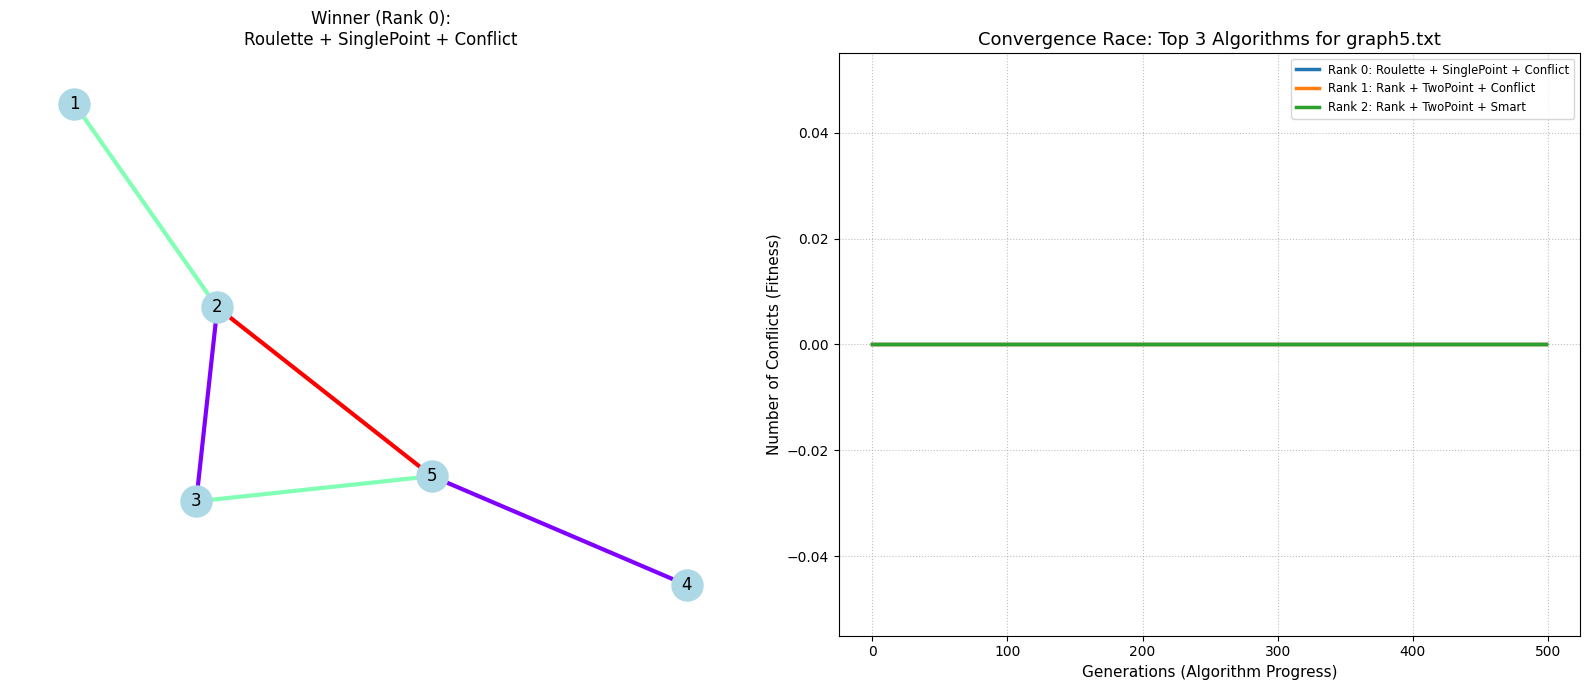

Full table saved to: resultsGA/graph5.txt

DEBUG ZA FAJL: graph6.txt
Stvarni broj čvorova: 6
Stvarni broj ivica: 9
Izračunata Delta: 3


>>> ANALYZING: graph6.txt
[TYPE]: Random G(n,p) Graph
[THEORY]: Vizing's Theorem: Class 1 or 2
Top 3 Combinations for graph6.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤══════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │     time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪══════════╡
│      0 │ Roulette    │ TwoPoint    │ Random     │             0 │         3 │ 0.006819 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      1 │ Tournament  │ TwoPoint    │ Smart      │             0 │         3 │ 0.010883 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      2 │ Tournament  │ SinglePoint │ Conflict   │             0 │         3 │ 0.010925 │
╘════

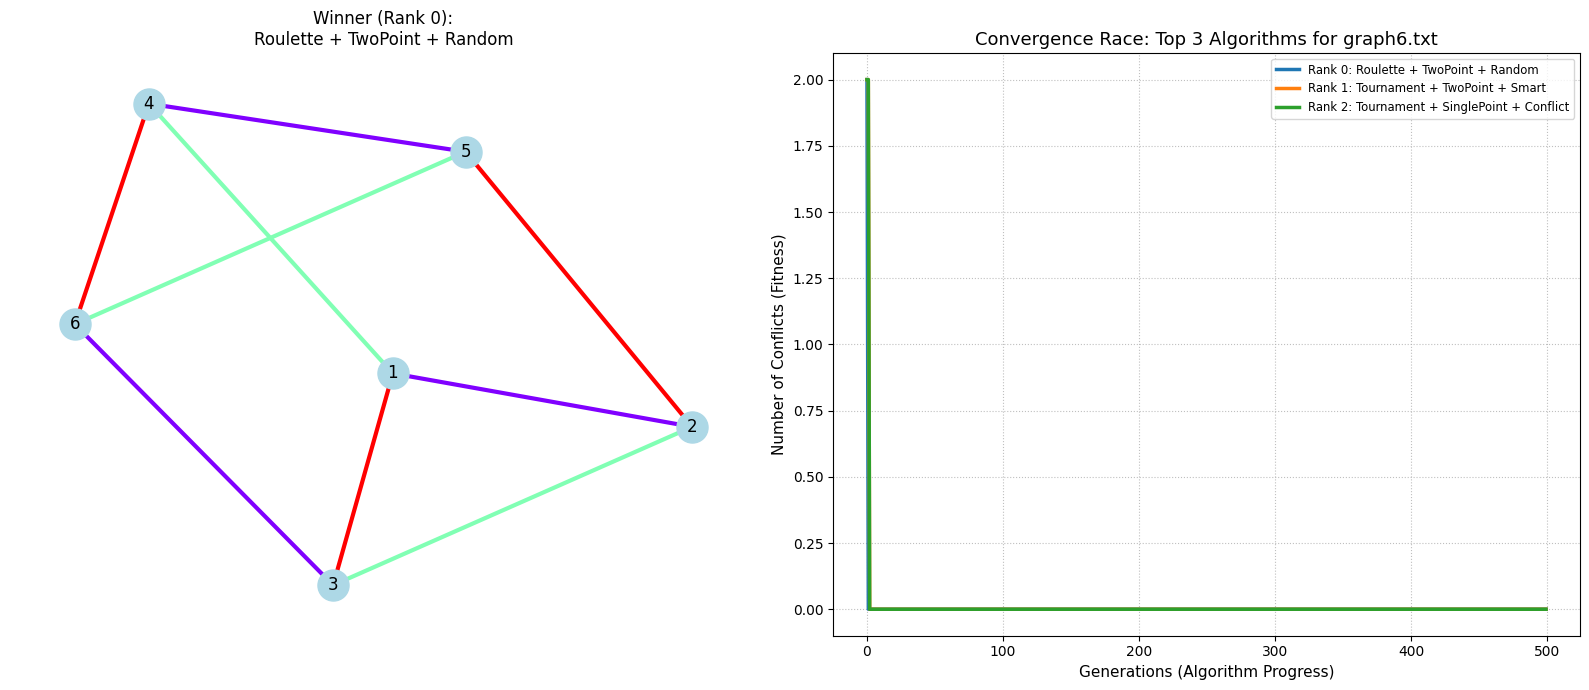

Full table saved to: resultsGA/graph6.txt

DEBUG ZA FAJL: graph9.txt
Stvarni broj čvorova: 9
Stvarni broj ivica: 8
Izračunata Delta: 3


>>> ANALYZING: graph9.txt
[TYPE]: Random G(n,p) Graph
[THEORY]: Vizing's Theorem: Class 1 or 2
Top 3 Combinations for graph9.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤══════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │     time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪══════════╡
│      0 │ Roulette    │ TwoPoint    │ Random     │             0 │         3 │ 0.003932 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      1 │ Rank        │ Uniform     │ Smart      │             0 │         3 │ 0.004287 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      2 │ Rank        │ TwoPoint    │ Smart      │             0 │         3 │ 0.004466 │
╘════

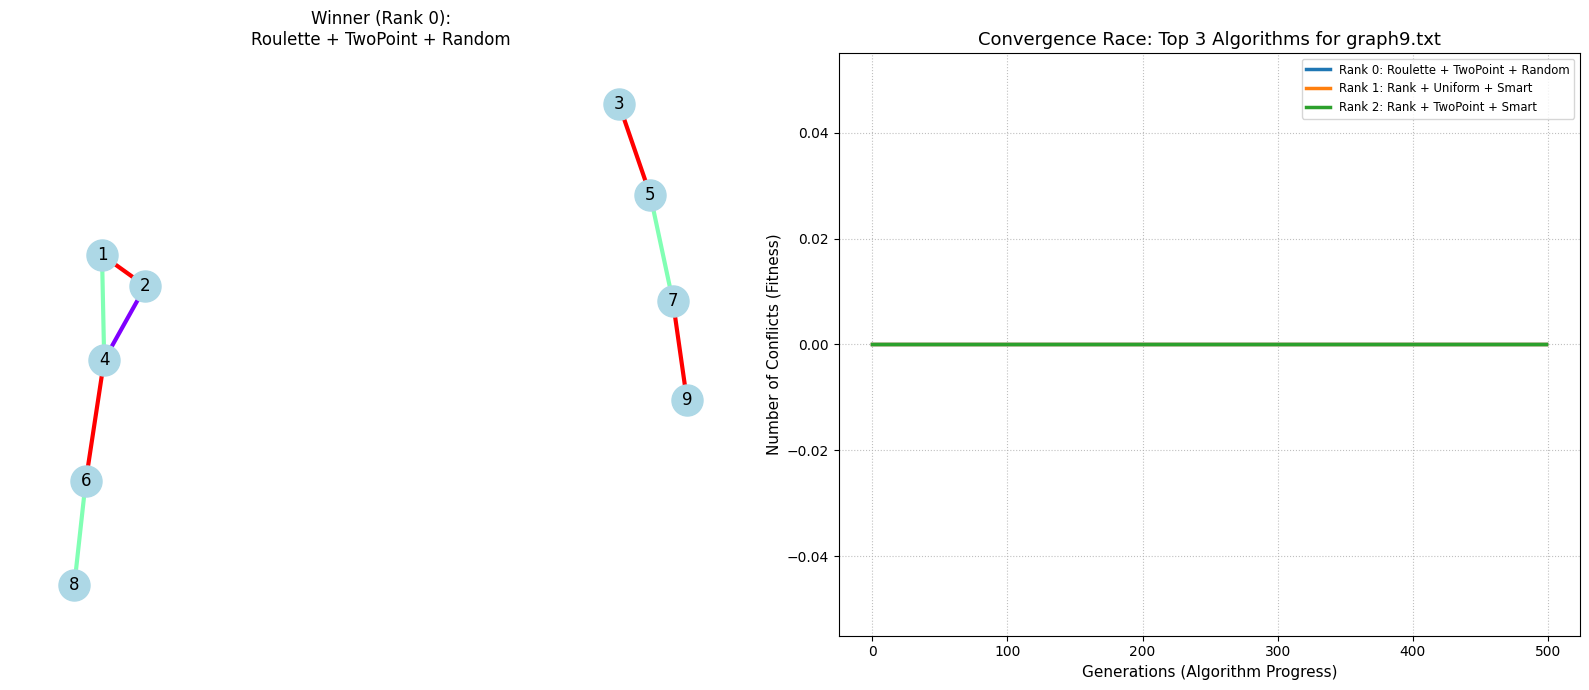

Full table saved to: resultsGA/graph9.txt

########################################
# ENTERING FOLDER: bigTests
########################################

DEBUG ZA FAJL: big22.txt
Stvarni broj čvorova: 22
Stvarni broj ivica: 140
Izračunata Delta: 17


>>> ANALYZING: big22.txt
[TYPE]: Unknown Graph Type
Top 3 Combinations for big22.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤═════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │    time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪═════════╡
│      0 │ Tournament  │ TwoPoint    │ Smart      │             0 │        17 │ 0.99378 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼─────────┤
│      1 │ Tournament  │ SinglePoint │ Smart      │             0 │        17 │ 1.26607 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼─────────┤
│      2 │ Tournament  │ Uniform 

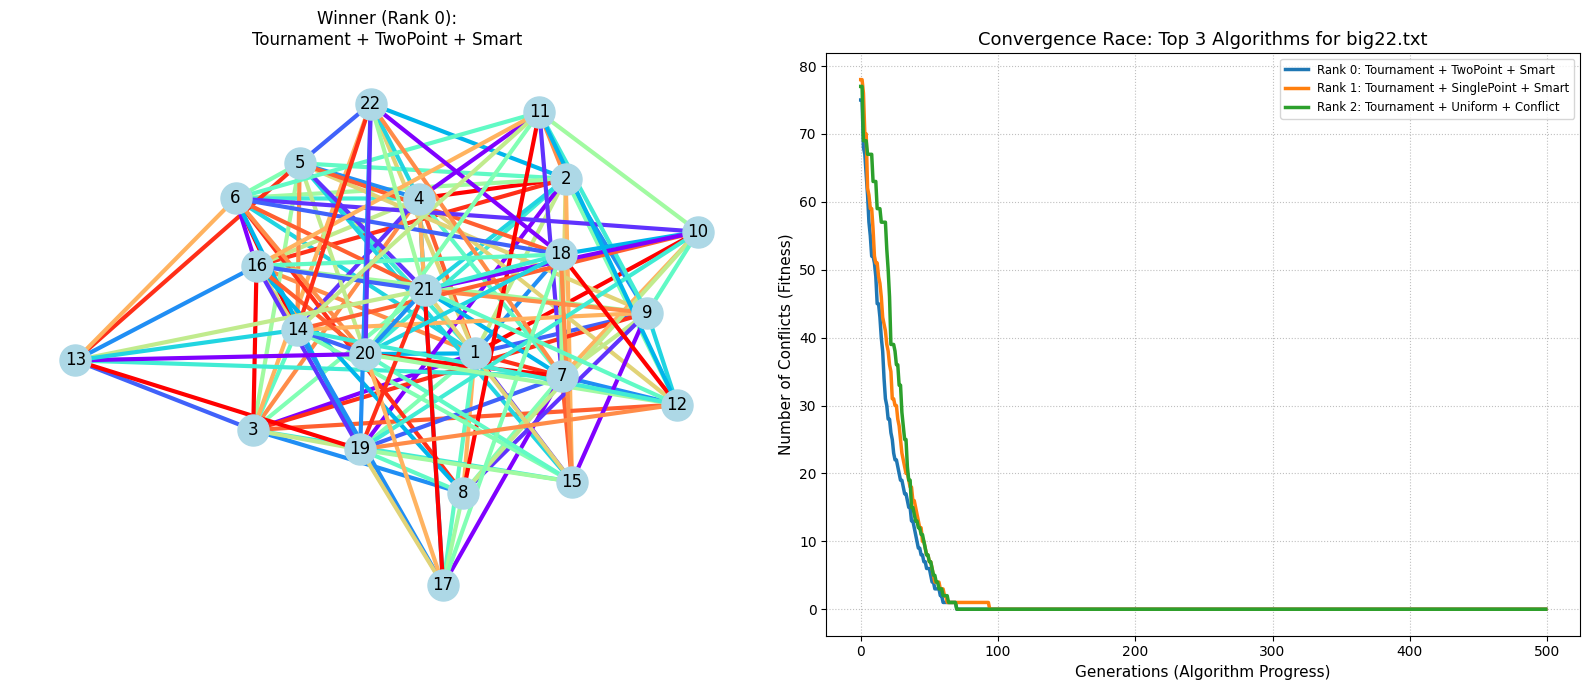

Full table saved to: resultsGA/big22.txt

DEBUG ZA FAJL: big23.txt
Stvarni broj čvorova: 23
Stvarni broj ivica: 71
Izračunata Delta: 11


>>> ANALYZING: big23.txt
[TYPE]: Unknown Graph Type
Top 3 Combinations for big23.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤══════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │     time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪══════════╡
│      0 │ Tournament  │ SinglePoint │ Conflict   │             0 │        11 │ 0.288792 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      1 │ Tournament  │ SinglePoint │ Smart      │             0 │        11 │ 0.29514  │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      2 │ Tournament  │ TwoPoint    │ Conflict   │             0 │        11 │ 0.297696 │
╘════════╧═════════════╧═════════════╧══════════

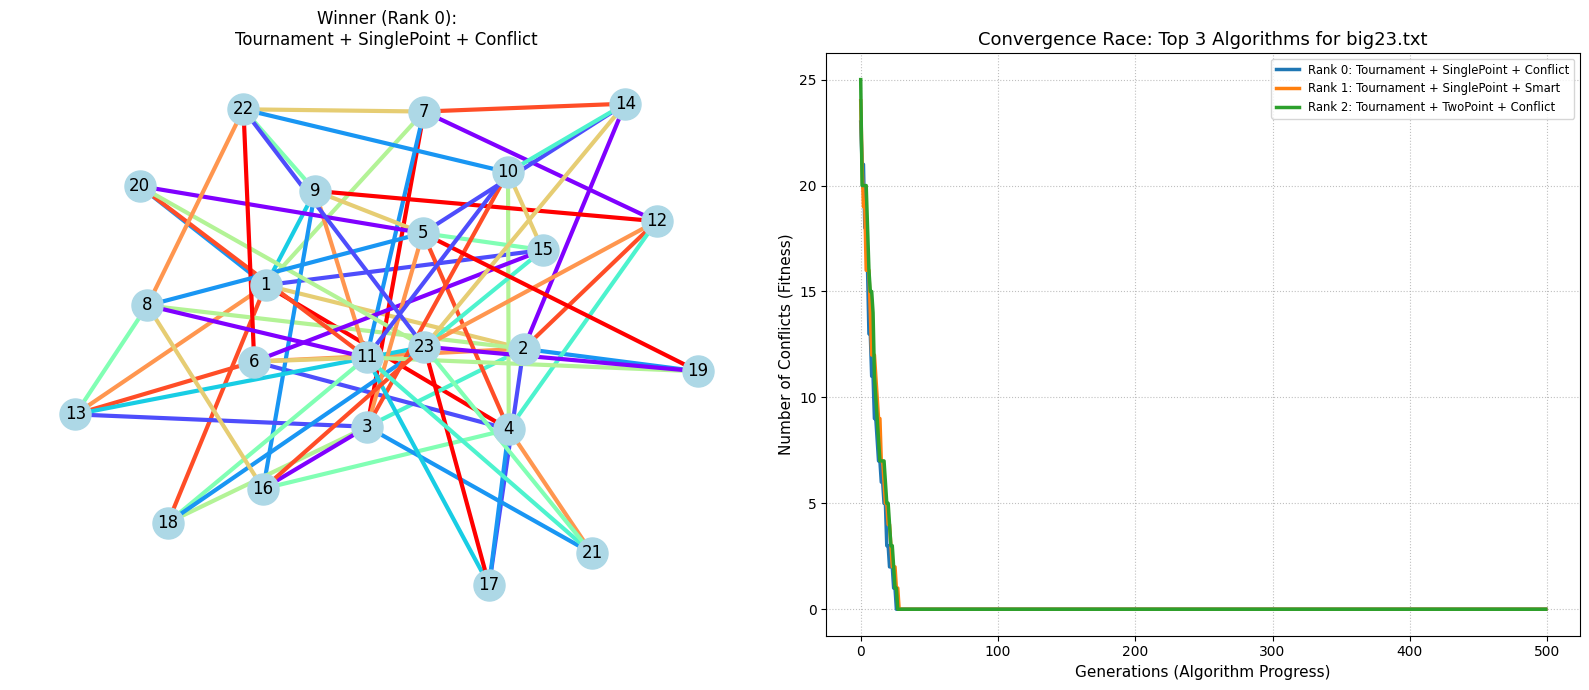

Full table saved to: resultsGA/big23.txt

DEBUG ZA FAJL: big30.txt
Stvarni broj čvorova: 30
Stvarni broj ivica: 275
Izračunata Delta: 23


>>> ANALYZING: big30.txt
[TYPE]: Unknown Graph Type
Top 3 Combinations for big30.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤═════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │    time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪═════════╡
│      0 │ Tournament  │ SinglePoint │ Smart      │             0 │        23 │ 4.87633 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼─────────┤
│      1 │ Tournament  │ TwoPoint    │ Conflict   │             0 │        23 │ 5.48701 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼─────────┤
│      2 │ Tournament  │ Uniform     │ Conflict   │             0 │        23 │ 5.59202 │
╘════════╧═════════════╧═════════════╧════════════╧════

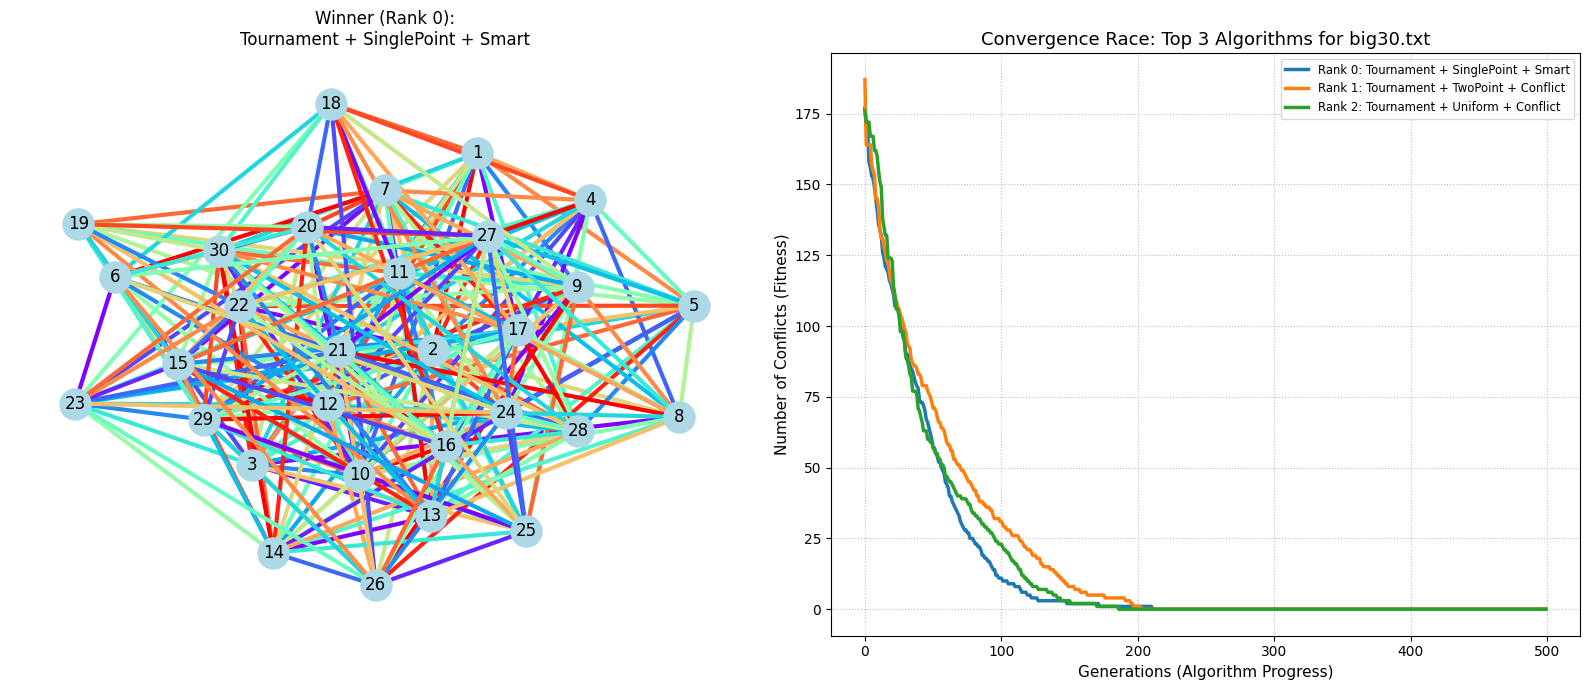

Full table saved to: resultsGA/big30.txt

DEBUG ZA FAJL: big47.6.txt
Stvarni broj čvorova: 47
Stvarni broj ivica: 236
Izračunata Delta: 23


>>> ANALYZING: big47.6.txt
[TYPE]: Unknown Graph Type
Top 3 Combinations for big47.6.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤═════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │    time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪═════════╡
│      0 │ Tournament  │ Uniform     │ Conflict   │             0 │        23 │ 1.55523 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼─────────┤
│      1 │ Tournament  │ Uniform     │ Smart      │             0 │        23 │ 1.67047 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼─────────┤
│      2 │ Tournament  │ TwoPoint    │ Smart      │             0 │        23 │ 1.739   │
╘════════╧═════════════╧═════════════╧═══════════

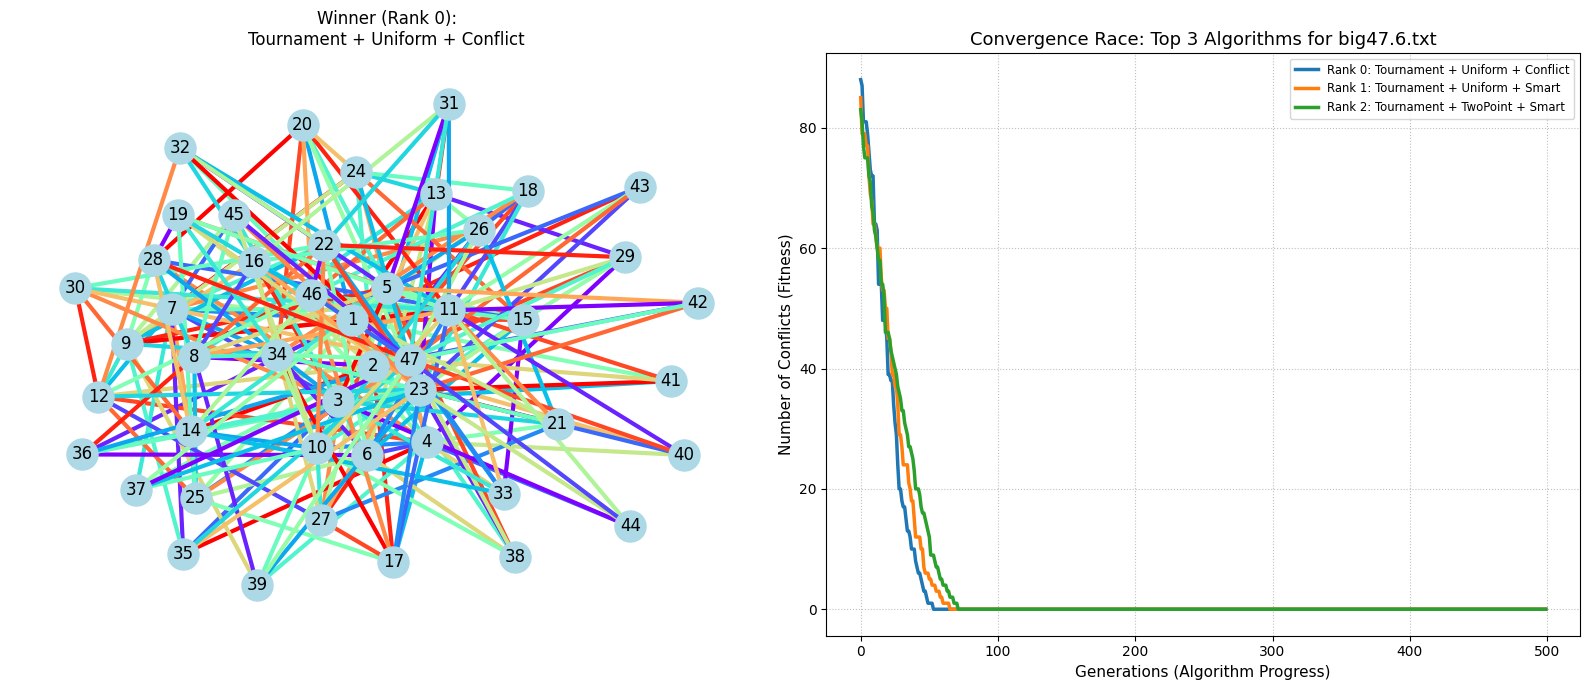

Full table saved to: resultsGA/big47.6.txt

DEBUG ZA FAJL: big55.txt
Stvarni broj čvorova: 55
Stvarni broj ivica: 625
Izračunata Delta: 32


>>> ANALYZING: big55.txt
[TYPE]: Unknown Graph Type
Top 3 Combinations for big55.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤══════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │     time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪══════════╡
│      0 │ Tournament  │ Uniform     │ Smart      │             0 │        32 │  8.41317 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      1 │ Tournament  │ TwoPoint    │ Smart      │             0 │        32 │ 10.9377  │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      2 │ Tournament  │ SinglePoint │ Smart      │             0 │        32 │ 12.4192  │
╘════════╧═════════════╧═════════════╧═══════

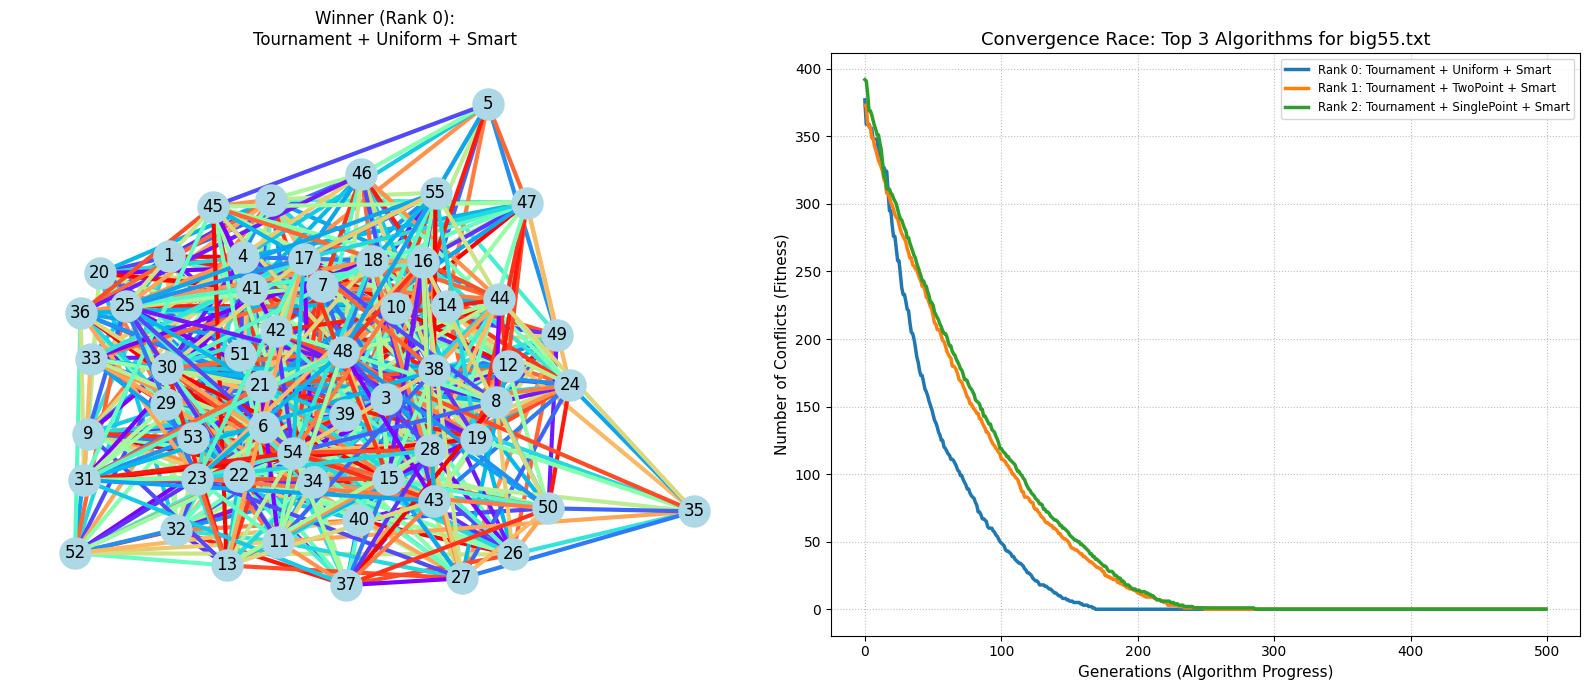

Full table saved to: resultsGA/big55.txt

DEBUG ZA FAJL: big64.txt
Stvarni broj čvorova: 64
Stvarni broj ivica: 547
Izračunata Delta: 25


>>> ANALYZING: big64.txt
[TYPE]: Unknown Graph Type
Top 3 Combinations for big64.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤══════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │     time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪══════════╡
│      0 │ Tournament  │ Uniform     │ Conflict   │             0 │        25 │  9.26025 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      1 │ Tournament  │ TwoPoint    │ Conflict   │             0 │        25 │ 13.775   │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼──────────┤
│      2 │ Tournament  │ SinglePoint │ Conflict   │             0 │        25 │ 14.8905  │
╘════════╧═════════════╧═════════════╧═════════

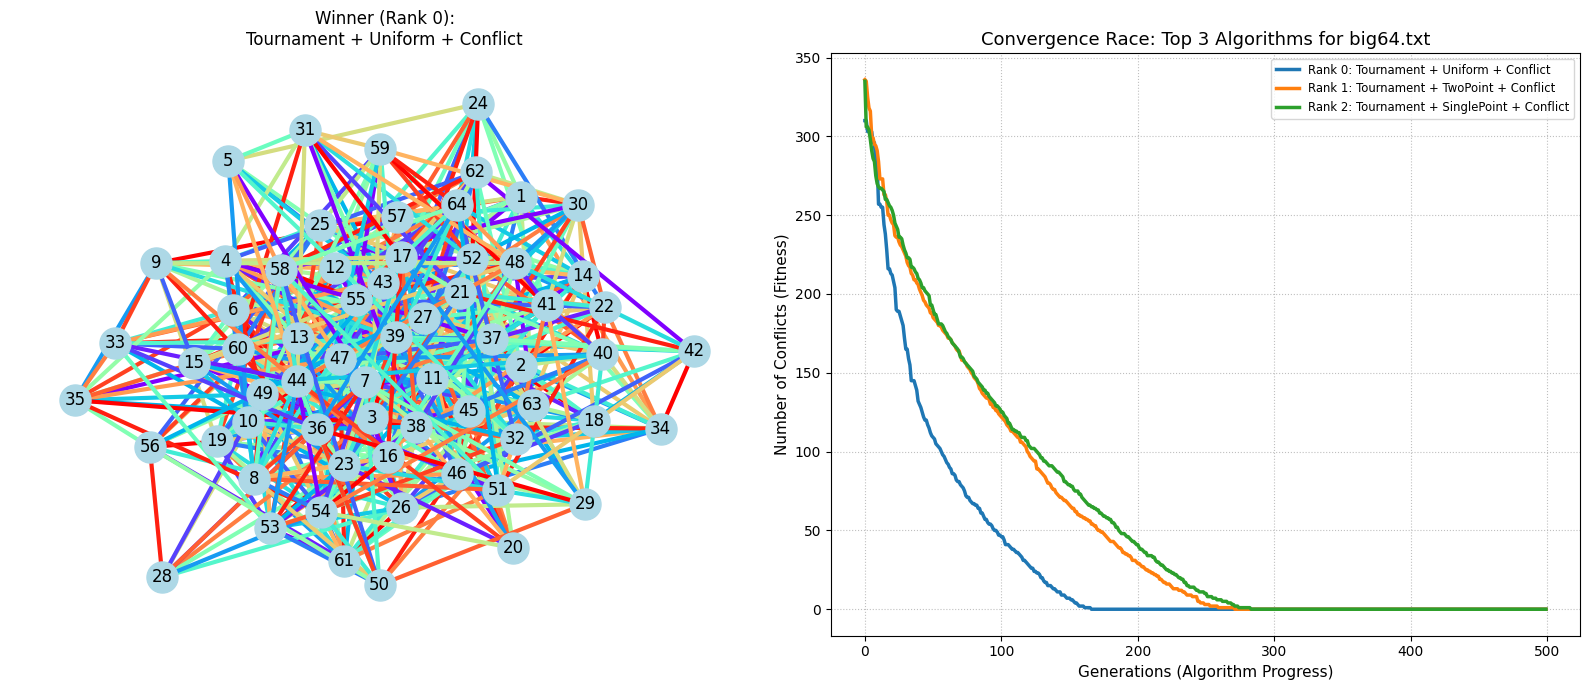

Full table saved to: resultsGA/big64.txt

DEBUG ZA FAJL: big70.txt
Stvarni broj čvorova: 70
Stvarni broj ivica: 287
Izračunata Delta: 14


>>> ANALYZING: big70.txt
[TYPE]: Unknown Graph Type
Top 3 Combinations for big70.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤═════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │    time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪═════════╡
│      0 │ Tournament  │ Uniform     │ Conflict   │             0 │        14 │ 3.18542 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼─────────┤
│      1 │ Tournament  │ TwoPoint    │ Smart      │             0 │        14 │ 3.4356  │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼─────────┤
│      2 │ Tournament  │ Uniform     │ Smart      │             0 │        14 │ 3.51379 │
╘════════╧═════════════╧═════════════╧════════════╧════

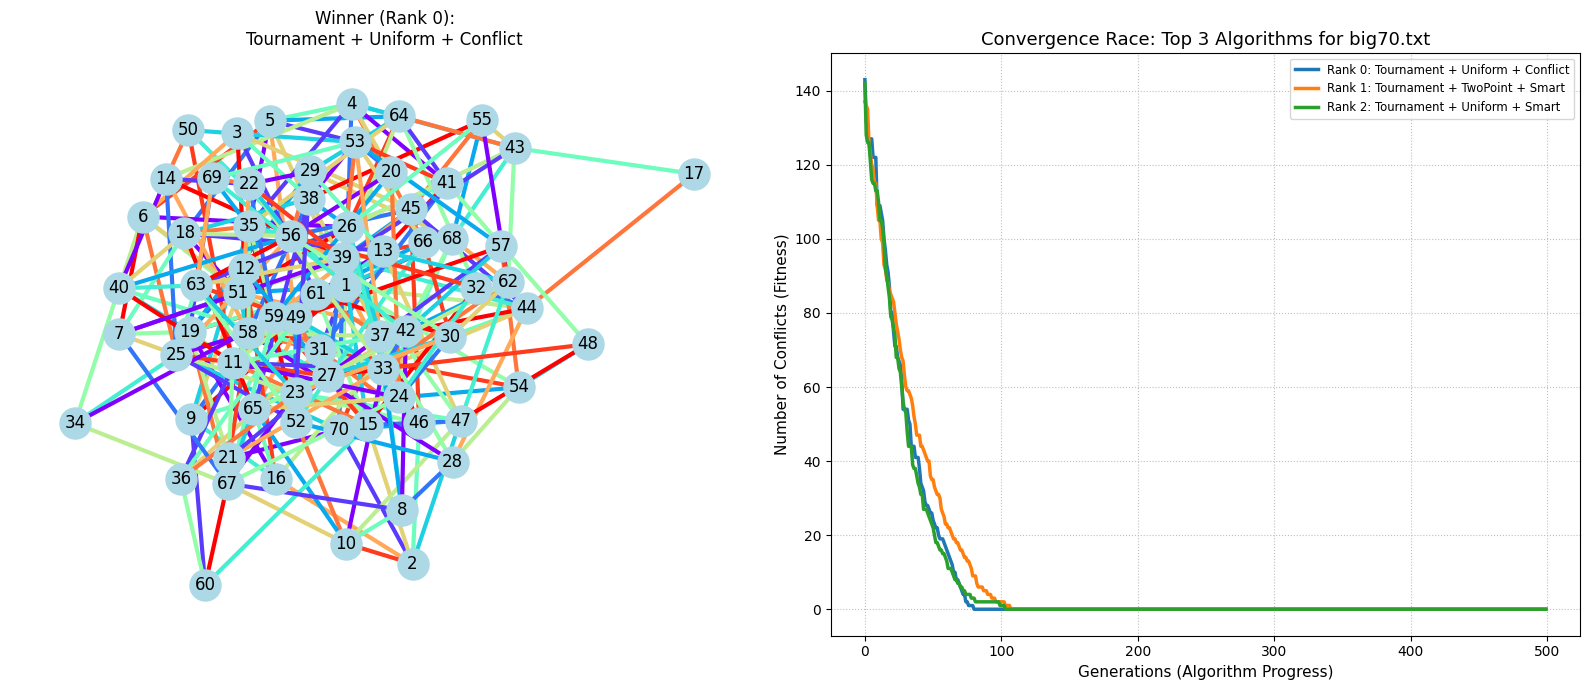

Full table saved to: resultsGA/big70.txt

DEBUG ZA FAJL: big79.txt
Stvarni broj čvorova: 79
Stvarni broj ivica: 500
Izračunata Delta: 20


>>> ANALYZING: big79.txt
[TYPE]: Unknown Graph Type
Top 3 Combinations for big79.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤═════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │    time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪═════════╡
│      0 │ Tournament  │ Uniform     │ Smart      │             0 │        20 │ 6.8073  │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼─────────┤
│      1 │ Tournament  │ TwoPoint    │ Smart      │             0 │        20 │ 7.91254 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼─────────┤
│      2 │ Tournament  │ Uniform     │ Conflict   │             0 │        20 │ 8.64588 │
╘════════╧═════════════╧═════════════╧════════════╧════

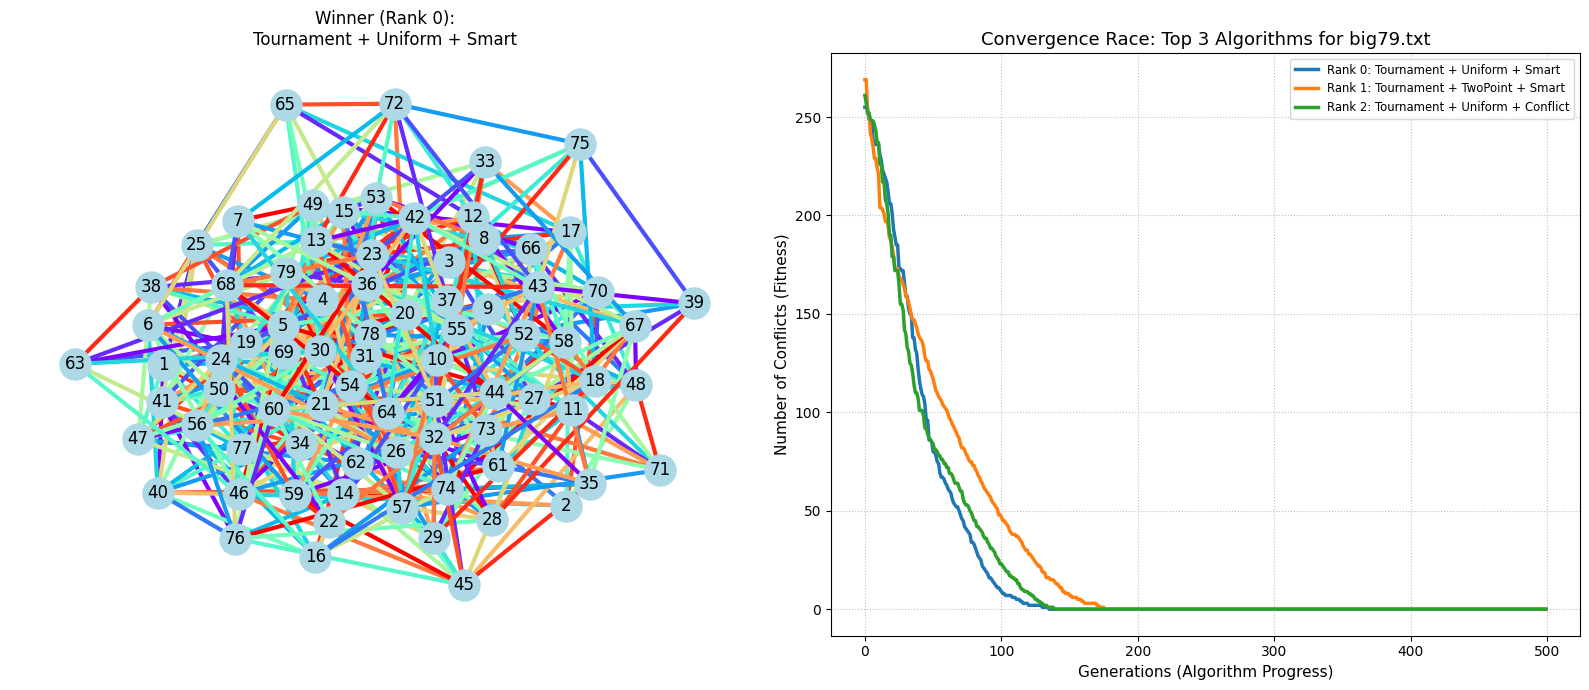

Full table saved to: resultsGA/big79.txt

DEBUG ZA FAJL: big95.txt
Stvarni broj čvorova: 95
Stvarni broj ivica: 817
Izračunata Delta: 49


>>> ANALYZING: big95.txt
[TYPE]: Unknown Graph Type
Top 3 Combinations for big95.txt:
╒════════╤═════════════╤═════════════╤════════════╤═══════════════╤═══════════╤═════════╕
│   Rank │ selection   │ crossover   │ mutation   │   num of conf │   colours │    time │
╞════════╪═════════════╪═════════════╪════════════╪═══════════════╪═══════════╪═════════╡
│      0 │ Tournament  │ Uniform     │ Smart      │             0 │        49 │ 11.1825 │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼─────────┤
│      1 │ Tournament  │ Uniform     │ Conflict   │             0 │        49 │ 15.358  │
├────────┼─────────────┼─────────────┼────────────┼───────────────┼───────────┼─────────┤
│      2 │ Tournament  │ TwoPoint    │ Smart      │             0 │        49 │ 15.6368 │
╘════════╧═════════════╧═════════════╧════════════╧════

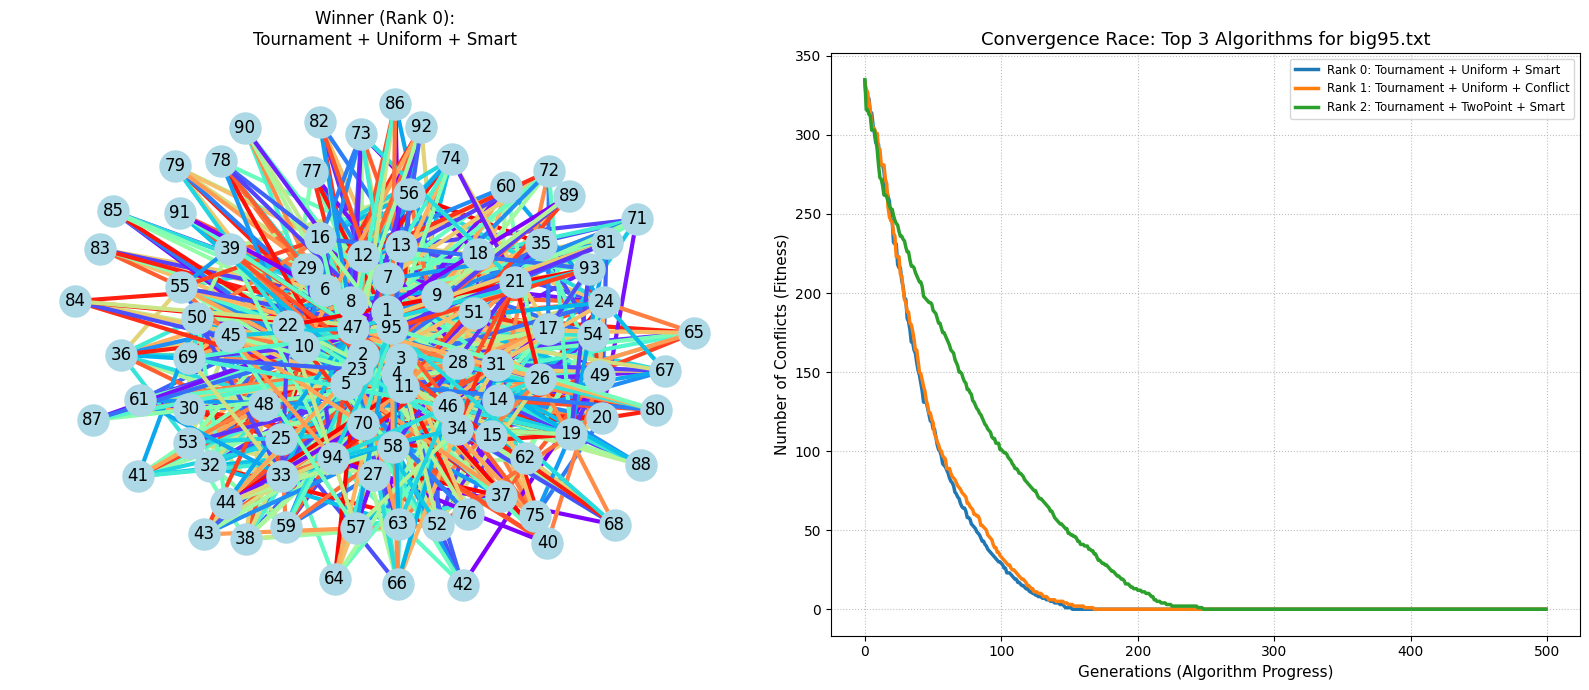

Full table saved to: resultsGA/big95.txt


In [8]:
#Novo ucitavanje fajla

targetFolders = ['smallTests','bigTests']

for folder in targetFolders:
    #kreiramo putanju za pretragu
    searchPath = os.path.join('tests',folder,"*.txt")
    allFiles = sorted(glob.glob(searchPath))

    if not allFiles:
        print(f"No files found in: tests/{folder}")
        continue

    print(f"\n{'#'*40}\n# ENTERING FOLDER: {folder}\n{'#'*40}")

    for f in allFiles:
        #fileName = os.path.basename(f)
        processAndVisualize(f)